### Lead Scoring Case Study
#### With 37 predictors the case study aims to predict whether a particular student will take up a course or not. These students are termed as Lead and we have to find the probability (score) of the students who have high potential of conversion. They are termed as hot lead in the case study. 

In [223]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [224]:
#set to show all cols and rows
pd.options.display.max_rows=None
pd.options.display.max_columns=None

### Importing the dataset

In [225]:
# Importing the datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the DataFrame

In [226]:
lead_data.shape

(9240, 37)

In [227]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [228]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation

In [229]:
## It is mentioned in the case study problem statement that columns with value "Select" is as good as null value.
## This needs to be trated as nulls and needs to be handled.

In [230]:
#Replace select with nan values and check overall missing data in the dataframe.
lead_data = lead_data.replace('Select', np.nan)

In [231]:
# Check for missing Values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [232]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Checking and dropping variables which have high percent of nan values

In [233]:
print("Count of each value\n",lead_data['How did you hear about X Education'].value_counts())
print("Count of nulls",lead_data['How did you hear about X Education'].isnull().sum())

Count of each value
 Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64
Count of nulls 7250


In [234]:
print("Count of each value\n",lead_data['Lead Profile'].value_counts())
print("Count of nulls",lead_data['Lead Profile'].isnull().sum())

Count of each value
 Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Count of nulls 6855


In [235]:
#Maximum number of columns values are null so dropping them
# Drop columns which have more than 65-70% of nulls
lead_data.drop(['How did you hear about X Education','Lead Profile'],axis=1,inplace=True)
lead_data.shape

(9240, 35)

#### Checking columns which have only one value through out all data points and dropping them as they would be insignificant in the model

In [236]:
#Get the value of the below column
lead_data.groupby(['Magazine','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']).size()

Magazine  Update me on Supply Chain Content  Get updates on DM Content  I agree to pay the amount through cheque
No        No                                 No                         No                                          9240
dtype: int64

In [237]:
#Since the columns above only have one value throughout, we will be dropping them since no variance in a variable is insignificant
lead_data.drop(['Magazine','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
lead_data.shape

(9240, 31)

In [238]:
#Check for missing % of values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Check the column value frequency and impute the nan's with most occuring value for a column

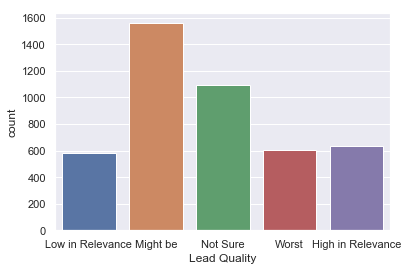

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(x='Lead Quality', data=lead_data)
plt.show()

In [240]:
print("Count of each value\n",lead_data['Lead Quality'].value_counts())
print("Count of nulls",lead_data['Lead Quality'].isnull().sum())

Count of each value
 Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64
Count of nulls 4767


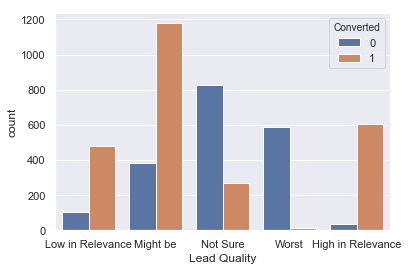

In [241]:
#Lead Quality is based on "data and intuition the the employee who has been assigned to the lead" as per data dictionary
#Imputing it with "Might be" will imply there are chances of the Lead to convert. So "Not Sure" seems like a better choice for imputation
#Let's look at the countplot with hue as Converted
sns.countplot(x='Lead Quality',hue='Converted', data=lead_data)
plt.show()

In [242]:
# As we can see from the above countplot Might be is associated with Lead getting converted so this column will be imputed with Not Sure
lead_data['Lead Quality'] = lead_data['Lead Quality'].fillna('Not Sure')
print("Number of null values:",lead_data['Lead Quality'].isnull().sum())
print(lead_data['Lead Quality'].describe())

Number of null values: 0
count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object


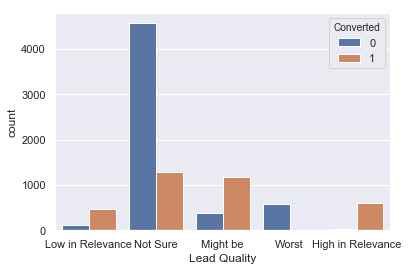

In [243]:
#Lead Quality is based on "data and intuition the the employee who has been assigned to the lead" as per data dictionary
#Imputing it with "Might be" will imply there are chances of the Lead to convert. So "Not Sure" seems like a better choice for imputation
#Let's look at the countplot with hue as Converted
sns.countplot(x='Lead Quality',hue='Converted', data=lead_data)
plt.show()

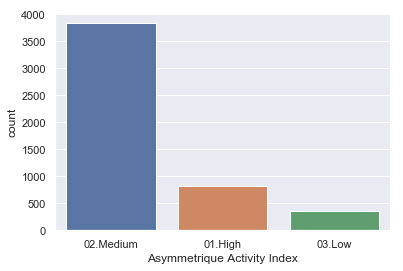

In [244]:
sns.countplot(x=lead_data['Asymmetrique Activity Index'])
plt.show()

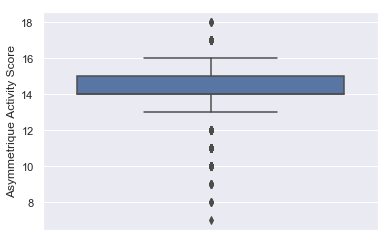

In [245]:
sns.boxplot(x='Asymmetrique Activity Score', data=lead_data,orient='v')
plt.show()

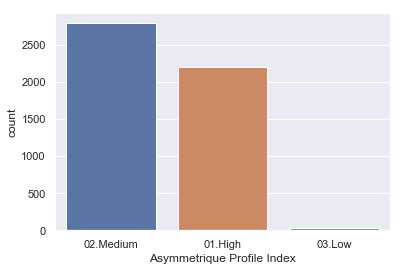

In [246]:
sns.countplot(x=lead_data['Asymmetrique Profile Index'])
plt.show()

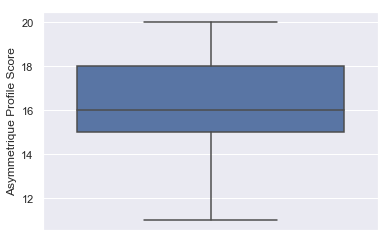

In [247]:
sns.boxplot(x='Asymmetrique Profile Score', data=lead_data,orient='v')
plt.show()

#### The data dictionary clearly states for the "Asymmetrique*" columns that it is "An index and score assigned to each customer based on their activity and their profile" The profile index frequency as we can see in the countplot is very close between High and Medium and imputig with either mean or median of the score does not make sense as it is based on each customer's profile and activity. 
#### Since these columns cannot be imputed and the null's for these are more than 45% we will be dropping it.

In [248]:
lead_data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [249]:
#Check for missing % of values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

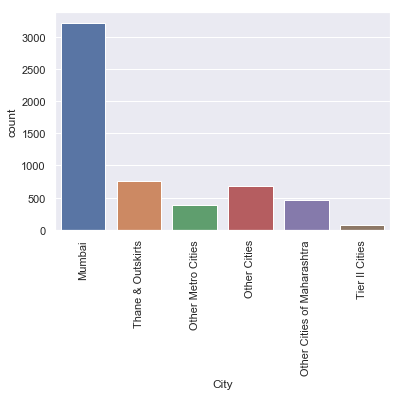

Count of nulls 3669


In [250]:
sns.countplot(x=lead_data['City'])
plt.xticks(rotation = 90)
plt.show()
print("Count of nulls",lead_data['City'].isnull().sum())

In [251]:
# Imputing city with Mumbai based on the frequency from the above plot. There is 39% of missing values
lead_data['City'] = lead_data['City'].fillna('Mumbai')
print("Number of null values:",lead_data.City.isnull().sum())
print(lead_data.City.describe())

Number of null values: 0
count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object


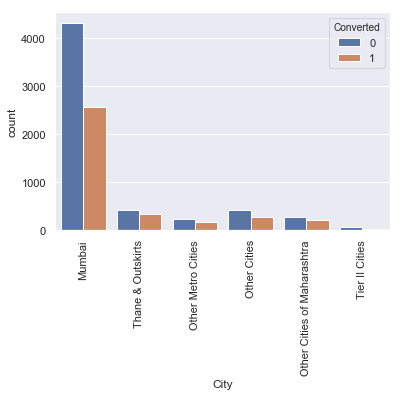

In [285]:
sns.countplot(x='City',hue='Converted',data=lead_data)
plt.xticks(rotation = 90)
plt.show()

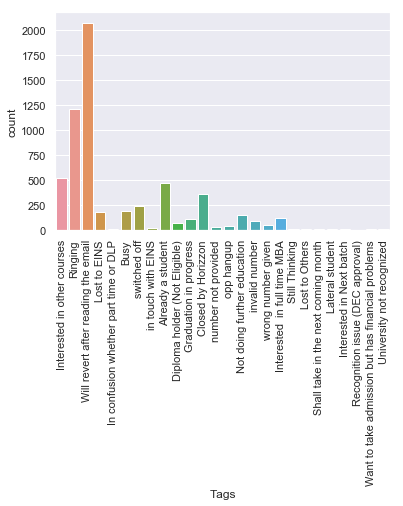

In [252]:
sns.countplot(x=lead_data['Tags'])
plt.xticks(rotation = 90)
plt.show()

In [253]:
print(lead_data['Tags'].value_counts())
print("Count of nulls",lead_data['Tags'].isnull().sum())

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [254]:
# Imputing Tags with Will revert after reading the email based on the frequency from the above plot. There is 36% of missing values
lead_data['Tags'] = lead_data['Tags'].fillna('Will revert after reading the email')
print("Number of null values:",lead_data.Tags.isnull().sum())
print(lead_data.Tags.describe())

Number of null values: 0
count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object


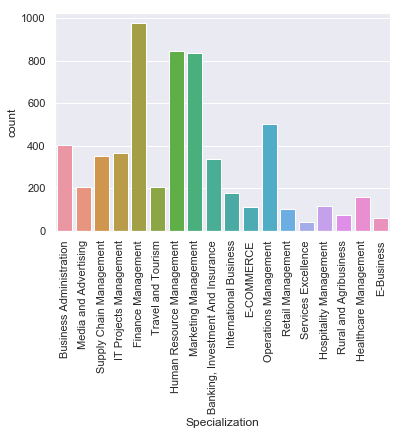

In [255]:
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation=90)
plt.show()

In [256]:
print(lead_data['Specialization'].value_counts())
print("Count of nulls",lead_data['Specialization'].isnull().sum())

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
Count of nulls 3380


In [257]:
#Imputing Specialization with "Other Specialization" because the count of column value is quite close so Other Specialization is a safer choice
lead_data['Specialization'] = lead_data['Specialization'].fillna('Other Specialization')
print("Number of null values:",lead_data.Specialization.isnull().sum())
print(lead_data.Specialization.describe())

Number of null values: 0
count                     9240
unique                      19
top       Other Specialization
freq                      3380
Name: Specialization, dtype: object


In [258]:
print(lead_data['Country'].value_counts())
print("Count of nulls",lead_data['Country'].isnull().sum())

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Italy                      2
Belgium                    2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Kenya                      1
Sri Lanka                  1
Denmark                    1
Indonesia                  1
Vietnam                    1
Liberia                    1
Russia        

In [259]:
# Imputing Country with India based on the frequency from the above plot. There is 26% of missing values
lead_data['Country'] = lead_data['Country'].fillna('India')
print("Number of null values:",lead_data.Country.isnull().sum())
print(lead_data.Country.describe())

Number of null values: 0
count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object


In [260]:
print(lead_data['What is your current occupation'].value_counts())
print("Count of nulls",lead_data['What is your current occupation'].isnull().sum())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Count of nulls 2690


In [261]:
# Imputing What is your current occupation with Unemployed based on the frequency from the above plot. There is 29% of missing values
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Unemployed')
print("Number of null values:",lead_data['What is your current occupation'].isnull().sum())
print(lead_data['What is your current occupation'].describe())

Number of null values: 0
count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object


In [262]:
print(lead_data['What matters most to you in choosing a course'].value_counts())
print("Count of nulls",lead_data['What matters most to you in choosing a course'].isnull().sum())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Count of nulls 2709


In [263]:
# Imputing What is your current occupation with Unemployed based on the frequency from the above plot. There is 29% of missing values
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects')
print("Number of null values:",lead_data['What matters most to you in choosing a course'].isnull().sum())
print(lead_data['What matters most to you in choosing a course'].describe())

Number of null values: 0
count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object


In [264]:
print(lead_data['Lead Source'].value_counts())
print("Count of nulls",lead_data['Lead Source'].isnull().sum())

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64
Count of nulls 36


In [265]:
#Clean the data values as both Google and google are the same
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [266]:
print(lead_data['Lead Source'].value_counts())
print("Count of nulls",lead_data['Lead Source'].isnull().sum())

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64
Count of nulls 36


In [267]:
# Imputing Country with India based on the frequency from the above plot. There is 26% of missing values
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Google')
print("Number of null values:",lead_data['Lead Source'].isnull().sum())
print(lead_data['Lead Source'].describe())

Number of null values: 0
count       9240
unique        20
top       Google
freq        2909
Name: Lead Source, dtype: object


In [268]:
lead_data.shape

(9240, 27)

#### Univariate anaysis for columns whith many unique values    

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

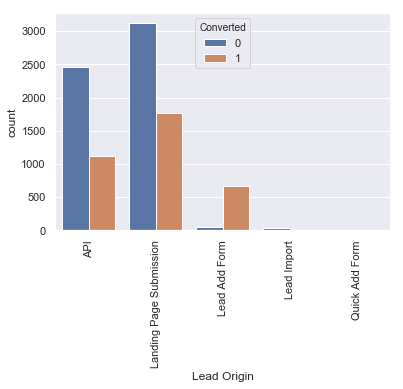

In [269]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

#### API and Landing Page submission have majority of the of the leads converted. Lead Add Form could imporve if more leads are generated via this channel

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

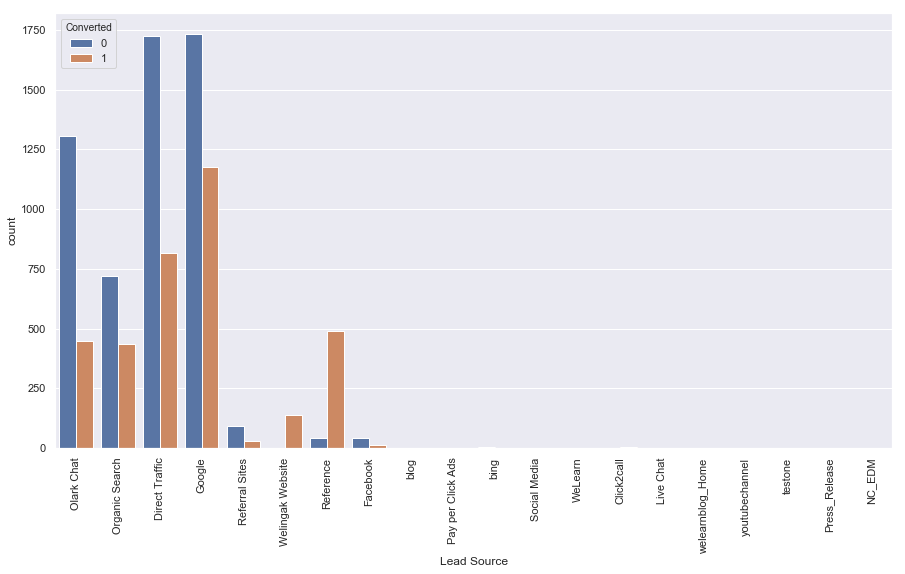

In [270]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [271]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Source')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

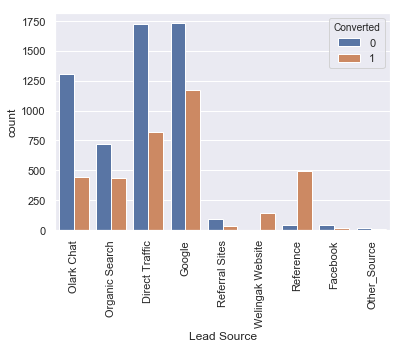

In [272]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

#### Google,Direct Traffic, Organic search and Olark chart have good amount leads coming in. Reference and Wellingnak website have good lead conversion rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

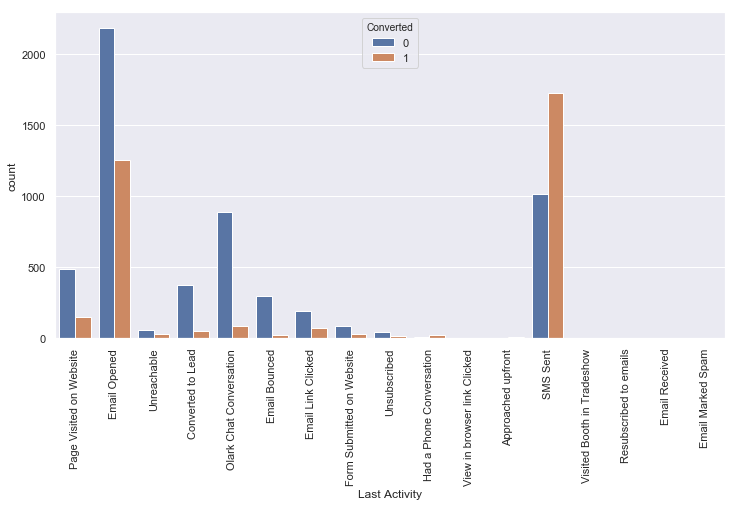

In [273]:
fig, axs = plt.subplots(figsize = (12,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [274]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront',
'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

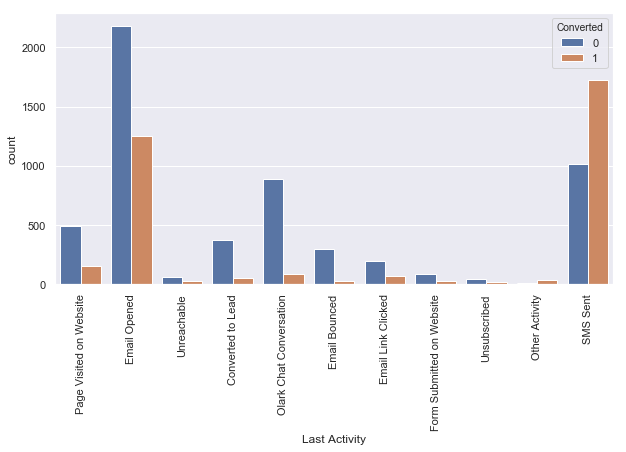

In [275]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

#### Last Activity of the leads who opened email, sms was sent, olark chat conversation their conversion rate is high

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

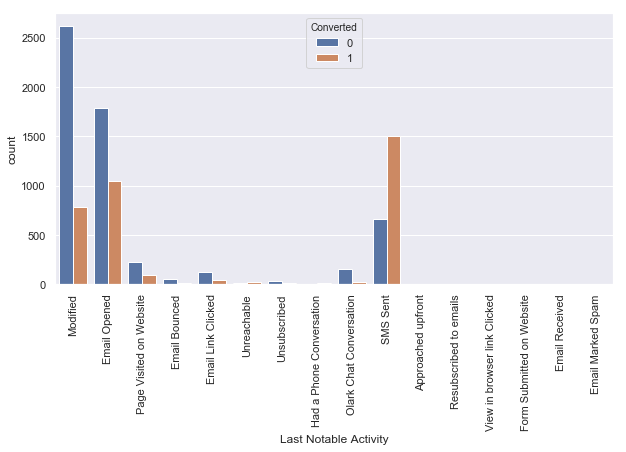

In [276]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
#Lead conversionrate for Last Notable activity of the leads to whom sms was sent is very high

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

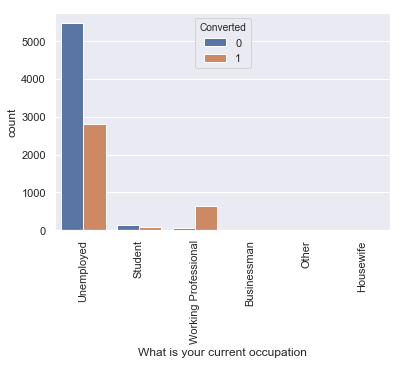

In [277]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
#Working professionals tend to have higher conversionrate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

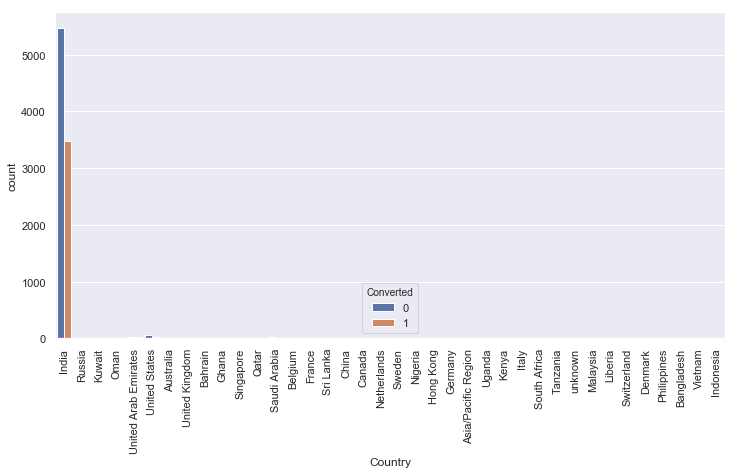

In [278]:
fig, axs = plt.subplots(figsize = (12,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [279]:
#as India is the most common country we replace the other countries as Other country to reduce the number of dummy variable created
lead_data['Country'] = lead_data['Country'].replace(['United States','United Arab Emirates','Singapore',
'Saudi Arabia',
'United Kingdom',
'Australia',
'Qatar',
'Bahrain',
'Hong Kong',
'France',
'Oman',
'unknown',
'Nigeria',
'Canada',
'South Africa',
'Germany',
'Kuwait',
'Sweden',
'Philippines',
'Uganda',
'Ghana',
'Netherlands',
'Italy',
'Bangladesh',
'Asia/Pacific Region',
'China',
'Belgium',
'Sri Lanka',
'Switzerland',
'Kenya',
'Liberia',
'Vietnam',
'Indonesia',
'Tanzania',
'Malaysia',
'Russia',
'Denmark'], 'Other Countries')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

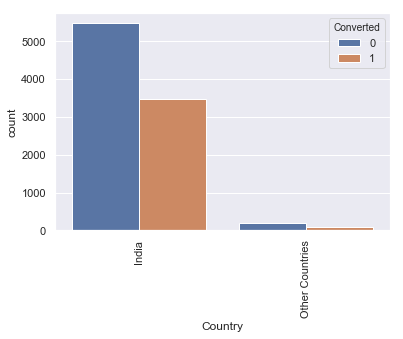

In [58]:
sns.countplot(x = "Country", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

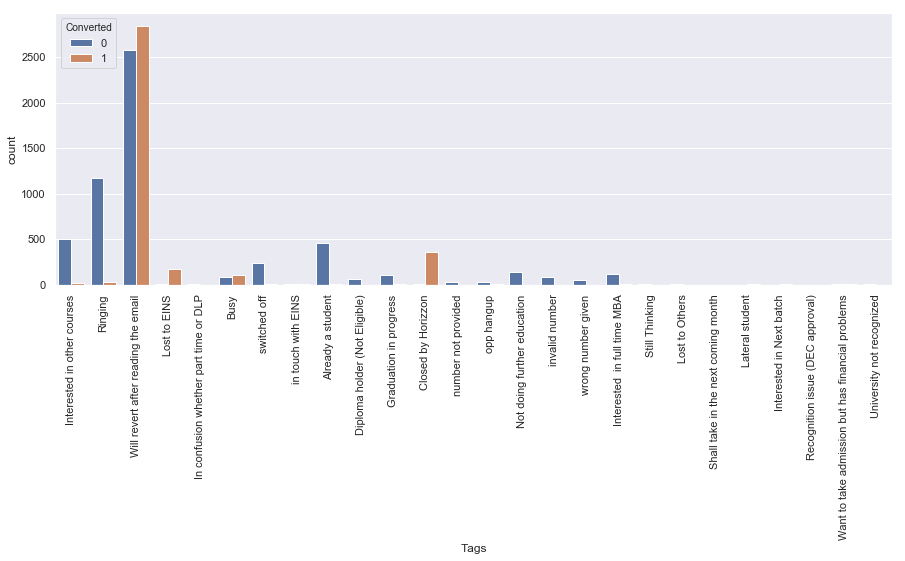

In [59]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [60]:
#The tags which have very less traction are all comibined as otehr tags to reduce creation of dummy variables
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

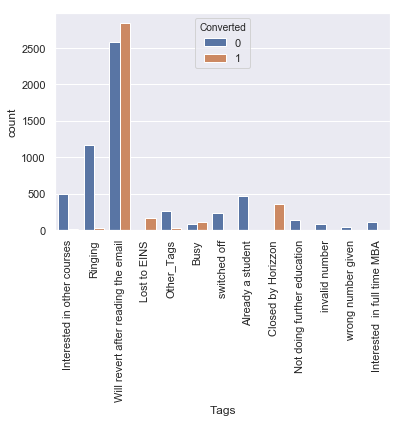

In [61]:
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)


### Bivariate Analysis

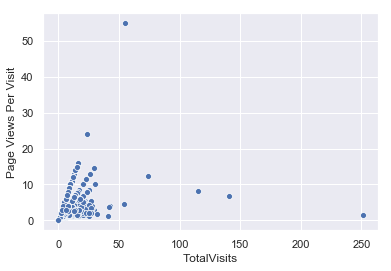

In [281]:
#he below graph we could see, Page Views Per Visit and Total Visits have a good linear relationship with each other.
sns.scatterplot(x='TotalVisits',y='Page Views Per Visit',data=lead_data)
plt.show()

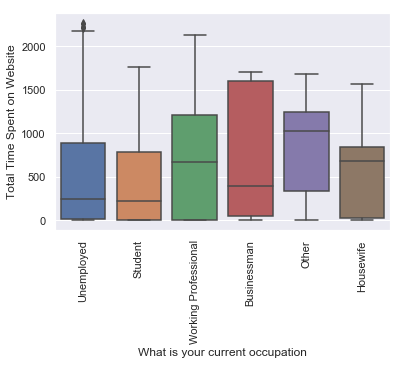

In [176]:
#the graph shows that the working professionals spend more time on website than other others.
sns.boxplot(x='What is your current occupation',y='Total Time Spent on Website',data=lead_data)
plt.xticks(rotation=90)
plt.show()


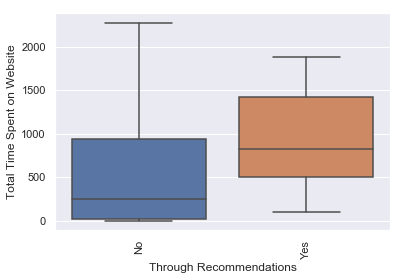

In [177]:
#in the graph we could see that we have high Time Spent on Website which comes through recommendations, which has more chances of converting.
sns.boxplot(x='Through Recommendations',y='Total Time Spent on Website',data=lead_data)
plt.xticks(rotation=90)
plt.show()

#### Outlier analysis for numerical columns

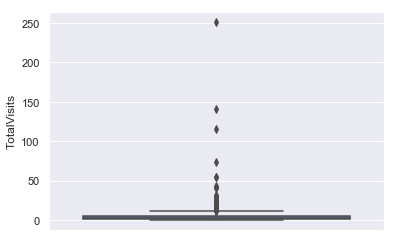

In [62]:
sns.boxplot(x='TotalVisits', data=lead_data,orient='v')
plt.show()

In [63]:
# IQR: Inter Quntile Range Method
# For TotalVisits
#plt.boxplot(lead_data.TotalVisits) plt.show()
Q1 = lead_data.TotalVisits.quantile(0.05)
Q3 = lead_data.TotalVisits.quantile(0.99)
IQR = Q3-Q1
TotalVisits = lead_data[(lead_data.TotalVisits>=Q1) & (lead_data.TotalVisits<=Q3)]
TotalVisits.shape

(9020, 27)

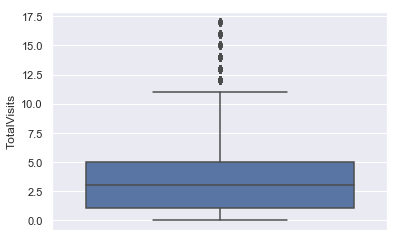

In [64]:
sns.boxplot(x='TotalVisits', data=TotalVisits,orient='v')
plt.show()

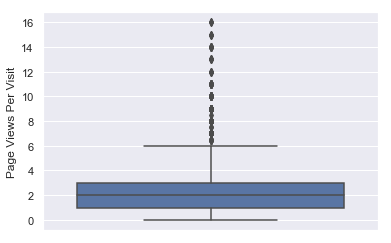

In [65]:
sns.boxplot(x='Page Views Per Visit', data=TotalVisits,orient='v')
plt.show()

In [66]:
# IQR: Inter Quntile Range Method
# For TotalVisits
#plt.boxplot(lead_data.TotalVisits plt.show()
Q1 = TotalVisits['Page Views Per Visit'].quantile(0.05)
Q3 = TotalVisits['Page Views Per Visit'].quantile(0.99)
IQR = Q3-Q1
leadata_final = TotalVisits[(TotalVisits['Page Views Per Visit']>=Q1) & (TotalVisits['Page Views Per Visit']<=Q3)]
leadata_final.shape

(8953, 27)

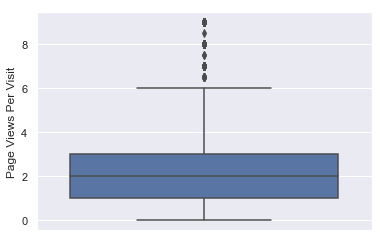

In [67]:
sns.boxplot(x='Page Views Per Visit', data=leadata_final,orient='v')
plt.show()

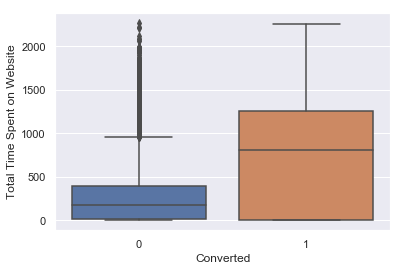

In [68]:
sns.boxplot(x='Converted',y='Total Time Spent on Website', data=TotalVisits,orient='v')
plt.show()

#### Leads spending more time on the website tend to converted to customer/student. We have only removed extreme outliers at 99 and .05 percentile

In [69]:
#Final check on %age of missing values
round(100*(leadata_final.isnull().sum()/len(leadata_final.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [70]:
#Drop prospect id as we do not need it
leadata_final.drop('Prospect ID',axis=1,inplace=True)

In [71]:
#Final data
leadata_final.shape

(8953, 26)

In [72]:
leadata_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 26 columns):
Lead Number                                      8953 non-null int64
Lead Origin                                      8953 non-null object
Lead Source                                      8953 non-null object
Do Not Email                                     8953 non-null object
Do Not Call                                      8953 non-null object
Converted                                        8953 non-null int64
TotalVisits                                      8953 non-null float64
Total Time Spent on Website                      8953 non-null int64
Page Views Per Visit                             8953 non-null float64
Last Activity                                    8953 non-null object
Country                                          8953 non-null object
Specialization                                   8953 non-null object
What is your current occupation                  8953 

In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadata_final[[ 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call','Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)

In [74]:
# Adding the results to the master dataframe
leadata_final = pd.concat([leadata_final, dummy1], axis=1)

In [75]:
leadata_final.shape

(8953, 117)

In [76]:
leadata_final.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

#### Dropping columns from the data frame for which dummy variables were created

In [77]:
# We have created dummies for the below variables, so we can drop them
leadata_final = leadata_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call','Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], 1)

In [78]:
leadata_final.shape

(8953, 96)

In [79]:
leadata_final.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
leadata_final.info()
#From the below it can be confirmed we only have numerical data and all categorical data have been converted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 96 columns):
Lead Number                                                                8953 non-null int64
Converted                                                                  8953 non-null int64
TotalVisits                                                                8953 non-null float64
Total Time Spent on Website                                                8953 non-null int64
Page Views Per Visit                                                       8953 non-null float64
Lead Origin_Landing Page Submission                                        8953 non-null uint8
Lead Origin_Lead Add Form                                                  8953 non-null uint8
Lead Origin_Lead Import                                                    8953 non-null uint8
Lead Source_Facebook                                                       8953 non-null uint8
Lead Source_Google                

### Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Putting feature variable to X
X = leadata_final.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [83]:
# Putting response variable to y
y = leadata_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling using StandardScaler

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9196,0.668862,1.848117,1.455819,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [87]:
### Checking the Lead conversion Rate
conversion = (sum(leadata_final['Converted'])/len(leadata_final['Converted'].index))*100
conversion ## There is about 40% lead conversion overall

37.92025019546521

### Model Building

In [89]:
#First Model
import statsmodels.api as sm
# Logistic regression model
logregm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logregm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6174
Model Family:                Binomial   Df Model:                           92
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.0
Date:                Sat, 16 Nov 2019   Deviance:                       2582.1
Time:                        21:44:57   Pearson chi2:                 4.00e+04
No. Iterations:                    23   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      20.0901   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                                                 0.1827      0.075      2.423      0.015       0.035       0.330
Total Time Spent on Website                                                 1.0587      0.061     17.266      0.000       0.938       1.179
Page Views Per Visit                                                       -0.2371      0.091     -2.599      0.009      -0.416      -0.058
Lead Origin_Landing Page Submission                                        -0.7742      0.219     -3.539      0.000      -1.203      -0.345
Lead Origin_Lead Add Form                                                   2.3919      0.829      2.886      0.004       0.768       4.016
Lead Origin_Lead Import                                                    28.5590   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                                      -27.6652   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                                          0.0723      0.186      0.388      0.698      -0.293       0.437
Lead Source_Olark Chat                                                      0.7642      0.242      3.152      0.002       0.289       1.239
Lead Source_Organic Search                                                  0.2313      0.208      1.113      0.266      -0.176       0.639
Lead Source_Other_Source                                                    0.6274      1.019      0.616      0.538      -1.369       2.624
Lead Source_Reference                                                      -0.7047      0.942     -0.748      0.455      -2.552       1.142
Lead Source_Referral Sites                                                 -0.1203      0.461     -0.261      0.794      -1.024       0.783
Lead Source_Welingak Website                                                3.2124      1.315      2.443      0.015       0.635       5.790
Do Not Email_Yes                                                           -0.8216      0.313     -2.625      0.009      -1.435      -0.208
Do Not Call_Yes                                                            23.5035   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Last Activity_Email Bounced                                                -0.9273      0.808     -1.148      0.251      -2.510       0.656
Last Activity_Email Link Clicked                                            0.7789      0.587      1.327      0.184      -0.371       1.929
Last Activity_Email Opened                                                  0.4326

### Feature Selection using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 42),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Other_Source', False, 24),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 29),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 26),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', False, 11),
 ('Last Activity_Page Visited on Website', False, 72),
 ('Last Activity

In [94]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assesing Model

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.4
Date:                Sat, 16 Nov 2019   Deviance:                       2742.7
Time:                        21:44:59   Pearson chi2:                 2.08e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6462      0.276     -5.957      0.000      -2.188      -1.105
Total Time Spent on Website                              1.0606      0.058     18.334      0.000       0.947       1.174
Lead Origin_Lead Add Form                                2.7065      0.380      7.128      0.000       1.962       3.451
Lead Source_Olark Chat                                   1.1579      0.139      8.348      0.000       0.886       1.430
Lead Source_Welingak Website                             3.4246      1.083      3.162      0.002       1.302       5.547
Do Not Email_Yes                                        -1.1173      0.221     -5.045      0.000      -1.551      -0.683
Last Activity_Olark Chat Conversation                   -1.6347      0.215     -7.593      0.000      -2.057      -1.213
What is your current occupation_Working Professional     1.2686      0.315      4.023      0.000       0.651       1.887
Tags_Busy                                                3.0296      0.364      8.317      0.000       2.316       3.744
Tags_Closed by Horizzon                                  7.6943      1.072      7.175      0.000       5.592       9.796
Tags_Interested in other courses                        -1.2325      0.498     -2.473      0.013      -2.209      -0.256
Tags_Lost to EINS                                        7.7070      0.670     11.504      0.000       6.394       9.020
Tags_Not doing further education                        -1.2513      1.127     -1.110      0.267      -3.460       0.958
Tags_Ringing                                            -2.1687      0.376     -5.771      0.000      -2.905      -1.432
Tags_Will revert after reading the email                 3.0949      0.283     10.939      0.000       2.540       3.649
Tags_invalid number                                     -2.5985      1.208     -2.150      0.032      -4.967      -0.230
Tags_switched off                                       -3.2037      0.720     -4.448      0.000      -4.615      -1.792
Tags_wrong number given                                -21.1189   1.18e+04     -0.002      0.999   -2.31e+04     2.3e+04
Lead Quality_Not Sure                                   -3.0793      0.136    -22.694      0.000      -3.345      -2.813
Lead Quality_Worst                                      -3.6148      0.665     -5.439      0.000      -4.917      -2.312
Last Notable Activity_SMS Sent                           2.4833      0.128     19.351      0.000       2.232       2.735
========================================================================================================================
"""

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Lead Quality_Not Sure,3.66
13,Tags_Will revert after reading the email,3.57
2,Lead Source_Olark Chat,1.86
1,Lead Origin_Lead Add Form,1.83
12,Tags_Ringing,1.64
19,Last Notable Activity_SMS Sent,1.59
5,Last Activity_Olark Chat Conversation,1.44
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.35
6,What is your current occupation_Working Profes...,1.27


In [98]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.079386
4696    0.011533
3274    0.542810
2164    0.000428
1667    0.941768
7024    0.198176
8018    0.045980
778     0.089370
6942    0.002178
4440    0.121053
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.93855712e-02, 1.15325579e-02, 5.42809968e-01, 4.27669849e-04,
       9.41768130e-01, 1.98176084e-01, 4.59800307e-02, 8.93697140e-02,
       2.17762975e-03, 1.21053372e-01])

##### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,1,0.079386,9196
1,0,0.011533,4696
2,0,0.542810,3274
3,0,0.000428,2164
4,1,0.941768,1667


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [101]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,1,0.079386,9196,0
1,0,0.011533,4696,0
2,0,0.542810,3274,1
3,0,0.000428,2164,0
4,1,0.941768,1667,1


In [102]:
# Check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.916546992181267


In [104]:
# Dropping Tags_wrong number given as it has high P-value of 0.99
col = col.drop('Tags_wrong number given', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [105]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1374.0
Date:                Sat, 16 Nov 2019   Deviance:                       2748.1
Time:                        21:45:00   Pearson chi2:                 2.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7941      0.273     -6.568      0.000      -2.329      -1.259
Total Time Spent on Website                              1.0620      0.058     18.363      0.000       0.949       1.175
Lead Origin_Lead Add Form                                2.7188      0.380      7.156      0.000       1.974       3.463
Lead Source_Olark Chat                                   1.1632      0.139      8.386      0.000       0.891       1.435
Lead Source_Welingak Website                             3.4151      1.083      3.154      0.002       1.293       5.538
Do Not Email_Yes                                        -1.1184      0.221     -5.065      0.000      -1.551      -0.686
Last Activity_Olark Chat Conversation                   -1.6351      0.215     -7.591      0.000      -2.057      -1.213
What is your current occupation_Working Professional     1.2809      0.317      4.046      0.000       0.660       1.901
Tags_Busy                                                3.1914      0.360      8.873      0.000       2.487       3.896
Tags_Closed by Horizzon                                  7.8448      1.072      7.320      0.000       5.744       9.945
Tags_Interested in other courses                        -1.0872      0.496     -2.190      0.029      -2.060      -0.114
Tags_Lost to EINS                                        7.8486      0.669     11.733      0.000       6.538       9.160
Tags_Not doing further education                        -1.1140      1.125     -0.990      0.322      -3.319       1.091
Tags_Ringing                                            -2.0054      0.371     -5.409      0.000      -2.732      -1.279
Tags_Will revert after reading the email                 3.2498      0.278     11.671      0.000       2.704       3.796
Tags_invalid number                                     -2.4522      1.205     -2.034      0.042      -4.815      -0.090
Tags_switched off                                       -3.0402      0.718     -4.236      0.000      -4.447      -1.634
Lead Quality_Not Sure                                   -3.0857      0.136    -22.737      0.000      -3.352      -2.820
Lead Quality_Worst                                      -3.5164      0.670     -5.252      0.000      -4.829      -2.204
Last Notable Activity_SMS Sent                           2.4641      0.127     19.340      0.000       2.214       2.714
========================================================================================================================
"""

In [106]:
#Running Vif for the new model after dropping tag_wrong number column
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Lead Quality_Not Sure,3.60
13,Tags_Will revert after reading the email,3.51
2,Lead Source_Olark Chat,1.86
1,Lead Origin_Lead Add Form,1.83
12,Tags_Ringing,1.63
18,Last Notable Activity_SMS Sent,1.57
5,Last Activity_Olark Chat Conversation,1.44
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.35
6,What is your current occupation_Working Profes...,1.27


In [107]:
#Predict the conversion again for the new model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [108]:
y_train_pred[:10]

array([7.88186535e-02, 1.14155485e-02, 5.37963122e-01, 4.23572562e-04,
       9.42247511e-01, 1.98926220e-01, 4.61723646e-02, 8.93472910e-02,
       1.87385382e-03, 1.21069723e-01])

In [109]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [110]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,1,0.078819,9196,0
1,0,0.011416,4696,0
2,0,0.537963,3274,1
3,0,0.000424,2164,0
4,1,0.942248,1667,1


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9168661241423328


In [ ]:
#From the above it is clear the accuracy for new model did not drop

In [113]:
# Dropping Tags_Not doing further education as it has p-value little higher than 0.05
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [114]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1374.7
Date:                Sat, 16 Nov 2019   Deviance:                       2749.3
Time:                        21:45:00   Pearson chi2:                 2.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8772      0.265     -7.071      0.000      -2.397      -1.357
Total Time Spent on Website                              1.0616      0.058     18.361      0.000       0.948       1.175
Lead Origin_Lead Add Form                                2.7253      0.380      7.174      0.000       1.981       3.470
Lead Source_Olark Chat                                   1.1631      0.139      8.384      0.000       0.891       1.435
Lead Source_Welingak Website                             3.4083      1.083      3.147      0.002       1.286       5.531
Do Not Email_Yes                                        -1.1191      0.221     -5.075      0.000      -1.551      -0.687
Last Activity_Olark Chat Conversation                   -1.6327      0.215     -7.582      0.000      -2.055      -1.211
What is your current occupation_Working Professional     1.2914      0.317      4.073      0.000       0.670       1.913
Tags_Busy                                                3.2691      0.355      9.207      0.000       2.573       3.965
Tags_Closed by Horizzon                                  7.9232      1.070      7.404      0.000       5.826      10.021
Tags_Interested in other courses                        -1.0083      0.493     -2.045      0.041      -1.975      -0.042
Tags_Lost to EINS                                        7.9275      0.666     11.895      0.000       6.621       9.234
Tags_Ringing                                            -1.9271      0.366     -5.267      0.000      -2.644      -1.210
Tags_Will revert after reading the email                 3.3283      0.272     12.224      0.000       2.795       3.862
Tags_invalid number                                     -2.3724      1.204     -1.971      0.049      -4.732      -0.013
Tags_switched off                                       -2.9607      0.715     -4.141      0.000      -4.362      -1.559
Lead Quality_Not Sure                                   -3.0816      0.136    -22.728      0.000      -3.347      -2.816
Lead Quality_Worst                                      -3.5181      0.668     -5.265      0.000      -4.828      -2.208
Last Notable Activity_SMS Sent                           2.4678      0.127     19.363      0.000       2.218       2.718
========================================================================================================================
"""

In [282]:
#Predicting the probability again
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [116]:
y_train_pred[:10]

array([7.89971808e-02, 1.14517606e-02, 5.38856530e-01, 4.24590453e-04,
       9.41969794e-01, 1.98903029e-01, 4.62694544e-02, 8.93350438e-02,
       1.73643940e-03, 1.21040233e-01])

In [117]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [118]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,1,0.078997,9196,0
1,0,0.011452,4696,0
2,0,0.538857,3274,1
3,0,0.000425,2164,0
4,1,0.941970,1667,1


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9167065581617999


In [ ]:
## Again the accuracy of the model was not lost by dropping a vraible with high p-value

In [120]:
#Check vif for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Lead Quality_Not Sure,3.56
12,Tags_Will revert after reading the email,3.48
2,Lead Source_Olark Chat,1.86
1,Lead Origin_Lead Add Form,1.83
11,Tags_Ringing,1.62
17,Last Notable Activity_SMS Sent,1.57
5,Last Activity_Olark Chat Conversation,1.44
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.35
6,What is your current occupation_Working Profes...,1.27


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [121]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3661,  221],
       [ 301, 2084]], dtype=int64)

In [122]:
# Actual/Predicted           not converted    Converted
        # not Converted       3717            165
        # Converted           364             2021  

### Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8737945492662473

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9430705821741371

In [126]:
# Calculate false postive rate - predicting Conversion when customer did not convert
print(FP/ float(TN+FP))

0.05692941782586296


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.9041214750542299


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9240282685512368


#### Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

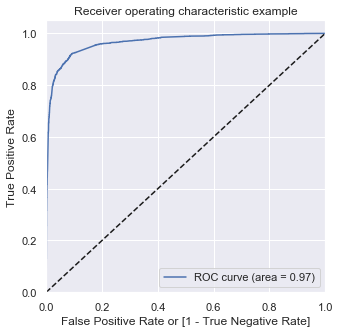

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cut off point

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.078997,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.011452,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.538857,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.000425,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.941970,1667,1,1,1,1,1,1,1,1,1,1,1


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.810595  0.969811  0.712777
0.2   0.2  0.904420  0.928302  0.889748
0.3   0.3  0.913834  0.915723  0.912674
0.4   0.4  0.913196  0.896855  0.923235
0.5   0.5  0.916707  0.873795  0.943071
0.6   0.6  0.917345  0.843187  0.962906
0.7   0.7  0.910803  0.806289  0.975013
0.8   0.8  0.891016  0.736688  0.985832
0.9   0.9  0.863731  0.656604  0.990984


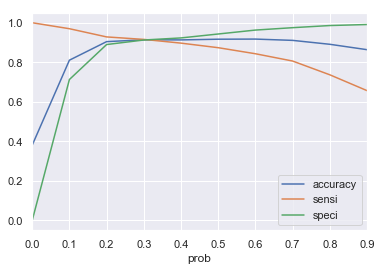

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.078997,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.011452,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.538857,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.000425,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.941970,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9138343705122068

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3543,  339],
       [ 201, 2184]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9157232704402516

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.9126738794435858

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08732612055641421


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8656361474435196


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9463141025641025


## Precision and Recall

In [144]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3661,  221],
       [ 301, 2084]], dtype=int64)

##### Precision
TP / TP + FP

In [145]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9041214750542299

In [146]:
from sklearn.metrics import precision_score, recall_score

In [147]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9041214750542299

In [148]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8737945492662473

##### Precision and recall tradeoff

In [149]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      1
 13      0
 14      1
 15      1
 16      1
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      1
 41      0
 42      0
 43      0
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      1
 59      0
 60      1
 61      1
 62      1
 63      0
 64      1
 65      1
 66      1
 67      1
 68      0
 69      1
 70      0
 71      1
 72      1
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      0
 80      0
 81      1
 82      0
 83      1
 84      1
 85      0
 86      1
 87      0
 88      1
 89      1
 90      0

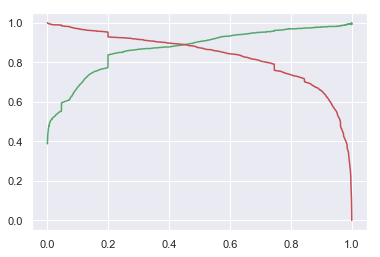

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Assesing the model on Test data

In [151]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7681,5.0,311,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
984,3.0,183,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6915,4.0,141,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2712,3.0,252,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [152]:
#Scale the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [153]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
7681,-0.304384,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
984,-0.538073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8135,0.794688,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
6915,-0.614753,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2712,-0.412100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

7681    0.008654
984     0.002557
8135    0.636895
6915    0.000532
2712    0.733736
244     0.001279
4698    0.003044
8287    0.046269
6791    0.894519
8970    0.001891
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

,0
7681,0.008654
984,0.002557
8135,0.636895
6915,0.000532
2712,0.733736


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,ID,0
0,0,7681,0.008654
1,0,984,0.002557
2,0,8135,0.636895
3,0,6915,0.000532
4,1,2712,0.733736


In [165]:
y_pred_final= y_pred_final.rename(columns={0:'converted_prob'})

In [166]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.921072226358898

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1571,  105],
       [ 107,  903]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8940594059405941

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9373508353221957

In [172]:
y_pred_final

,Converted,ID,converted_prob,final_predicted
0,0,7681,0.008654,0
1,0,984,0.002557,0
2,0,8135,0.636895,1
3,0,6915,0.000532,0
4,1,2712,0.733736,1
5,0,244,0.001279,0
6,0,4698,0.003044,0
7,0,8287,0.046269,0
8,1,6791,0.894519,1
9,0,8970,0.001891,0


#### Looking at the accuracy, specificity and sensitivity of the model on Test data set we can say the model created is good enough to predict the probability of lead conversion. The final variables are reliable enough to predict the probability of lead conversion